In [ ]:
import pandas as pd
raw_news = pd.read_csv('OnlineNewsPopularity.csv')
print(raw_news.columns) #61 columns / features
print(len(raw_news.columns))

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Above are the columns for the raw data. <br/> Below is the cleaned data.

In [ ]:
#first two columns are non-predictive, we remove them
news = raw_news.iloc[:,2:]
news.columns = news.columns.str[1:] # deletes the leading space given to us from csv to simplify the code
print(news.columns)
print(f'{len(news.columns)} columns')
print("\n\n")

# double check for NaN data
print(news.isnull().sum())
print("\n\n")

# double check for blank cells
print(news.isna().sum())

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

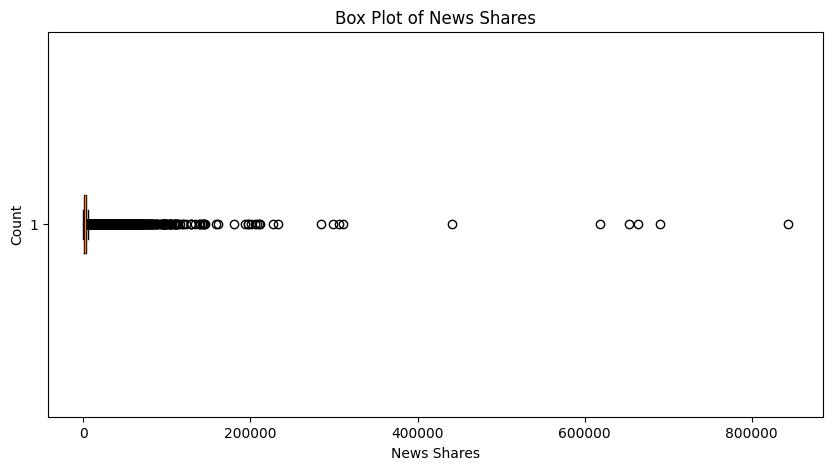

High:
843300

Low:
1

Q1:
946.0

Q3:
2800.0

Median:
1400.0

Mean:
3395.3801836343455

Standard Deviation:
11626.80410572882


In [ ]:
#plot news shares to see data spread
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
plt.figure(figsize=(10,5))
plt.boxplot(news['shares'], vert=False)
plt.xlabel('News Shares')
plt.ylabel('Count')
plt.title('Box Plot of News Shares')
plt.show()


#print the high, low, q1, q3, median, mean with labels for reference
print("High:")
print(max(news['shares']))
print("\nLow:")
print(min(news['shares']))
print("\nQ1:")
print(np.percentile(news['shares'], 25))
print("\nQ3:")
print(np.percentile(news['shares'], 75))
print("\nMedian:")
print(np.median(news['shares']))
print("\nMean:")
print(np.mean(news['shares']))
#print std
print("\nStandard Deviation:")
print(np.std(news['shares']))


Looking at the data and the graph above we decided we should perform a log transformation on the feature variable, shares. We tried other transformations such as inverse and sqrt() and exponential but found the log transformation to be the best.

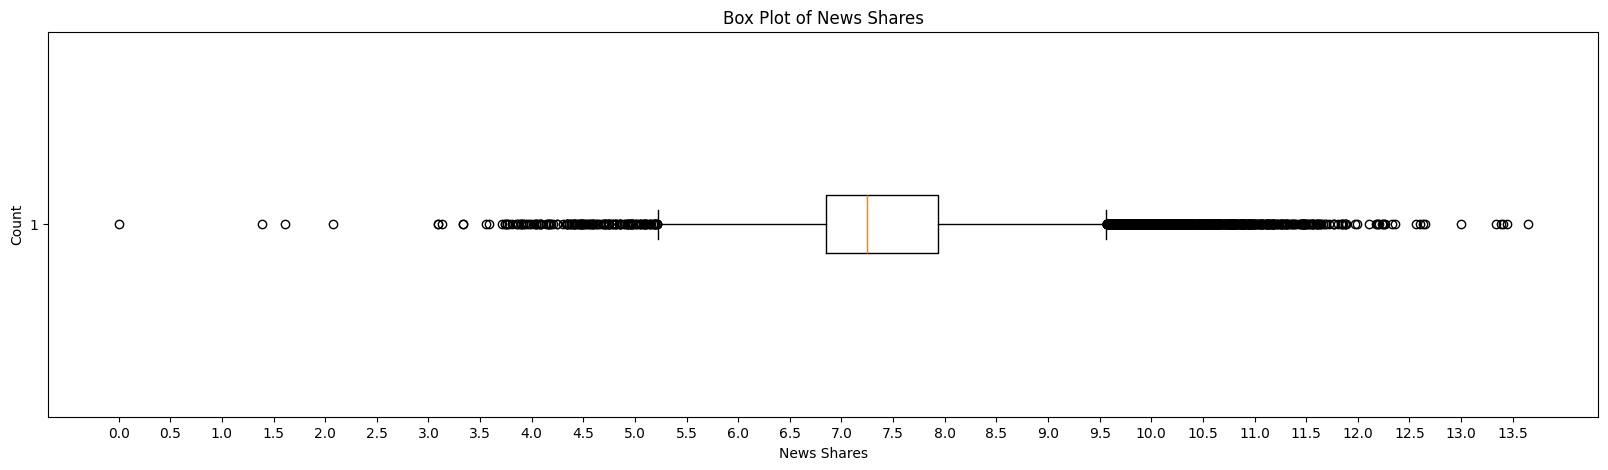

High:
13.645078045562732

Low:
0.0

Q1:
6.852242569051878

Q3:
7.937374696163295

Median:
7.24422751560335

Mean:
7.4748549241986275

Standard Deviation:
0.9304743537751409

Percentile 1:
5.942799375126701

Percentile 99:
10.362713348940513


In [ ]:
# checking log transform of shares
news['shares_log'] = np.log(news['shares'])

plt.figure(figsize=(20,5))
plt.boxplot(news['shares_log'], vert=False)
plt.xticks(np.arange(0, 14, 0.5))
plt.xlabel('News Shares')
plt.ylabel('Count')
plt.title('Box Plot of News Shares')
plt.show()

print("High:")
print(max(news['shares_log']))
print("\nLow:")
print(min(news['shares_log']))
print("\nQ1:")
print(np.percentile(news['shares_log'], 25))
print("\nQ3:")
print(np.percentile(news['shares_log'], 75))
print("\nMedian:")
print(np.median(news['shares_log']))
print("\nMean:")
print(np.mean(news['shares_log']))
print("\nStandard Deviation:")
print(np.std(news['shares_log']))
print("\nPercentile 1:")
print(np.percentile(news['shares_log'], 1))
print("\nPercentile 99:")
print(np.percentile(news['shares_log'], 99))

In [ ]:
# Build a linear regression model without higher-order terms and identify the most
# significant predictors.
#lr using ols
import statsmodels.api as sm
from statsmodels.formula.api import ols

lr_low = ols('shares_log ~ n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + weekday_is_sunday + is_weekend + LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + avg_positive_polarity + min_positive_polarity + max_positive_polarity + avg_negative_polarity + min_negative_polarity + max_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity + abs_title_sentiment_polarity', data=news)

#print summary
# print(lr_low.fit().summary())

# we identified the worst p values, those that were > 0.9 we drop them and re-evaluate to determine which are the most significant predictors
#drop "weekday_is_monday",
    # "weekday_is_tuesday",
    # "weekday_is_wednesday",
    # "weekday_is_thursday",
    # "weekday_is_friday",
    # "weekday_is_saturday",
    # "weekday_is_sunday",
    # "is_weekend",
    # "LDA_00",
    # "LDA_01",
    # "LDA_02",
    # "LDA_03",
    # "LDA_04",
    # "avg_positive_polarity",
    # "self_reference_max_shares"

lr_low_2 = ols(
    'shares_log ~ n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_avg_sharess + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + min_positive_polarity + max_positive_polarity + avg_negative_polarity + min_negative_polarity + max_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity + abs_title_sentiment_polarity',
    data=news
)

#print summary
# print(lr_low_2.fit().summary())

#now we look at the new p values and identify the highest and remove them, we now remove these features as they have a p value of > 0.3
#n_unique_tokens  n_non_stop_words  num_videos data_channel_is_lifestyle global_sentiment_polarity global_rate_negative_words max_positive_polarity min_negative_polarity


lr_low_3 = ols(
    'shares_log ~ n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs  + average_token_length + num_keywords + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_avg_sharess + global_subjectivity + global_rate_positive_words + rate_positive_words + rate_negative_words + min_positive_polarity + avg_negative_polarity + max_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity + abs_title_sentiment_polarity',
    data=news
)
# print(lr_low_3.fit().summary())
#next we remove p values of > 0.05
# kw_max_max  rate_negative_words  max_negative_polarity abs_title_sentiment_polarity


lr_low_4 = ols(
    'shares_log ~ n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs  + average_token_length + num_keywords + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_avg_sharess + global_subjectivity + global_rate_positive_words + rate_positive_words + min_positive_polarity + avg_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity',
    data=news
)

#next we found a few more with p values > 0.05 so we remove those being:
# n_non_stop_unique_tokens  rate_positive_words
lr_low_5 = ols(
    'shares_log ~ n_tokens_title + n_tokens_content + num_hrefs + num_self_hrefs + num_imgs  + average_token_length + num_keywords + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_avg_sharess + global_subjectivity + global_rate_positive_words + min_positive_polarity + avg_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity',
    data=news
)

#next we found a single feature with p value > 0.05 so we remove that one being:
# global_rate_positive_words
lr_low_6 = ols(
    'shares_log ~ n_tokens_title + n_tokens_content + num_hrefs + num_self_hrefs + num_imgs  + average_token_length + num_keywords + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_avg_sharess + global_subjectivity + min_positive_polarity + avg_negative_polarity + title_subjectivity + title_sentiment_polarity + abs_title_subjectivity',
    data=news
)
print(lr_low_6.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             shares_log   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:47:45   Log-Likelihood:                -51018.
No. Observations:               39644   AIC:                         1.021e+05
Df Residuals:                   39615   BIC:                         1.023e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# we copied this code from the stat220 lecture code, shown in class just to get the long formula
def create_bambi_formula(df, response_var):
    # Get all column names excluding the response variable
    predictors = df.columns[df.columns != response_var]

    # Handle special characters in column names (e.g., spaces, %, etc.)
    predictors = [f"`{col}`" if not col.isidentifier() else col for col in predictors]

    # Join all predictors into a formula string
    formula = f"{response_var} ~ " + " + ".join(predictors)
    return formula

formula = create_bambi_formula(news, 'shares_log')
print(formula)

shares_log ~ n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + weekday_is_sunday + is_weekend + LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + avg_positive_polarity + min_positive_polarity + max_positive_polarity + avg_negati

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = news.drop(['shares_log','shares'], axis=1)



y = news['shares_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(random_state=42, max_depth=8)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(importance_df)
#here we updated X to drop insignificant features from DecisionTree
X = X.drop(['rate_positive_words', 'num_self_hrefs', 'abs_title_sentiment_polarity',
               'title_subjectivity', 'rate_negative_words', 'weekday_is_sunday',
               'kw_min_min', 'kw_max_min', 'min_negative_polarity', 'num_videos',
               'min_positive_polarity', 'max_negative_polarity', 'num_keywords',
               'abs_title_subjectivity', 'n_non_stop_words', 'weekday_is_thursday',
               'weekday_is_wednesday', 'max_positive_polarity', 'weekday_is_tuesday',
               'weekday_is_friday', 'data_channel_is_lifestyle', 'data_channel_is_bus',
               'data_channel_is_world', 'weekday_is_monday', 'weekday_is_saturday'], axis=1)

#This removes insignificant features from linear regression
X = X.drop(['kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
            'n_tokens_content', 'self_reference_min_shares',
            'self_reference_avg_sharess'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(random_state=42, max_depth=8)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Mean Squared Error: 0.7800577526955746
Mean Squared Error: 0.7805655594810259

Feature Importances:
                          Feature  Importance
11                     kw_avg_avg    0.357860
12      self_reference_max_shares    0.105643
8            data_channel_is_tech    0.048869
13                     is_weekend    0.048788
7          data_channel_is_socmed    0.038874
10                     kw_max_max    0.036956
6   data_channel_is_entertainment    0.035082
9                      kw_avg_min    0.032545
2        n_non_stop_unique_tokens    0.030840
16                         LDA_02    0.029648
3                       num_hrefs    0.026703
15                         LDA_01    0.025289
1                 n_unique_tokens    0.023168
14                         LDA_00    0.023124
21     global_rate_positive_words    0.016028
19            global_subjectivity    0.014619
5            average_token_length    0.014041
20      global_sentiment_polarity    0.012546
18                        

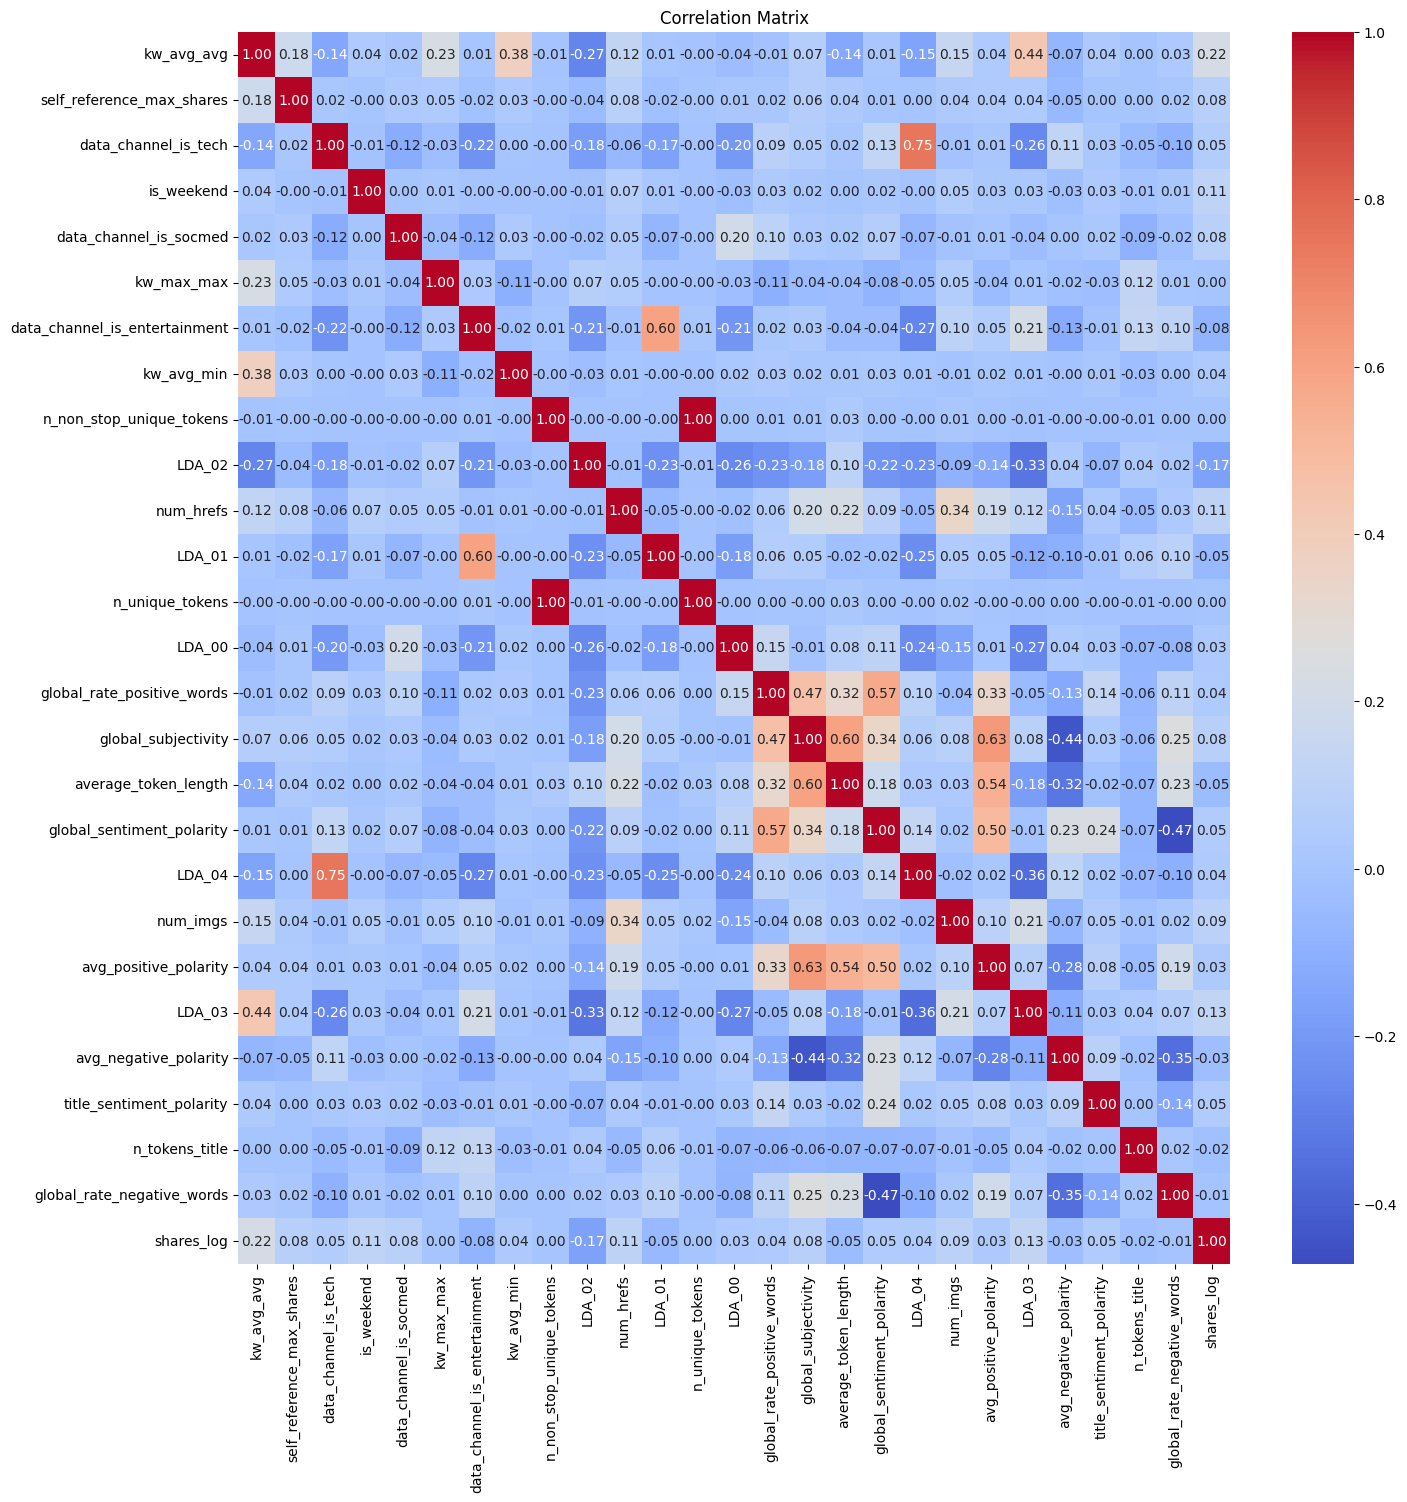

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 3, 1)
# sns.regplot(x='kw_avg_avg', y='shares_log', data=news)
# plt.title('kw_avg_avg vs. shares_log')
# plt.subplot(2, 3, 2)
# sns.regplot(x='self_reference_avg_sharess', y='shares_log', data=news)
# plt.title('self_reference_avg_shares vs. shares_log')
# plt.subplot(2, 3, 3)
# sns.regplot(x='kw_max_avg', y='shares_log', data=news)
# plt.title('kw_max_avg vs. shares_log')
# plt.subplot(2, 3, 4)
# sns.boxplot(x='data_channel_is_socmed', y='shares_log', data=news)
# plt.title('data_channel_is_socmed vs. shares_log')
# plt.subplot(2, 3, 5)
# sns.regplot(x='global_subjectivity', y='shares_log', data=news)
# plt.title('global_subjectivity vs. shares_log')
# plt.subplot(2, 3, 6)
# sns.regplot(x='min_positive_polarity', y='shares_log', data=news)
# plt.title('min_positive_polarity vs. shares_log')
# plt.tight_layout()
# plt.show()
features = ['kw_avg_avg','self_reference_max_shares','data_channel_is_tech','is_weekend','data_channel_is_socmed','kw_max_max','data_channel_is_entertainment','kw_avg_min','n_non_stop_unique_tokens','LDA_02','num_hrefs','LDA_01','n_unique_tokens','LDA_00','global_rate_positive_words','global_subjectivity','average_token_length','global_sentiment_polarity','LDA_04','num_imgs','avg_positive_polarity','LDA_03','avg_negative_polarity','title_sentiment_polarity','n_tokens_title','global_rate_negative_words','shares_log']

correlation_matrix = news[features].corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



EDA Technical Report:
Initially, we looked at the 'shares' target variable in a box plot to see how the data was distributed. We saw it was heavily skewed to the right so we tried a few transformations as mentioned above but we found the log transformation to the best which we have plotted above in another box plot.

Next we identified the least significant predictors and removed those variables from our model by identifying their p value and gradually removing them until the remaining variables were less than 0.05. In the end we kept about half of our original variables.

We created an Linear Regression OLS and a Decision Tree Regressor and removed the features that were shown to be insignificant using the tree's feature importance.

Looking at the correlation matrix we see that the two variables that have the greatest influence are kw_avg_avg and LDA_02, with a respective correlation value of 0.22 and -0.17. Several other noteworthy examples are LDA_03 with 0.13 and is_weekend with 0.11, and num_hrefs with 0.11.

This correlation matrix we see above only includes our statistically significant variables, here we see several variables that have a correlation of 0.00 with shares_log, we know these variables are indeed statistically significant but they have a low impact on the log_shares.

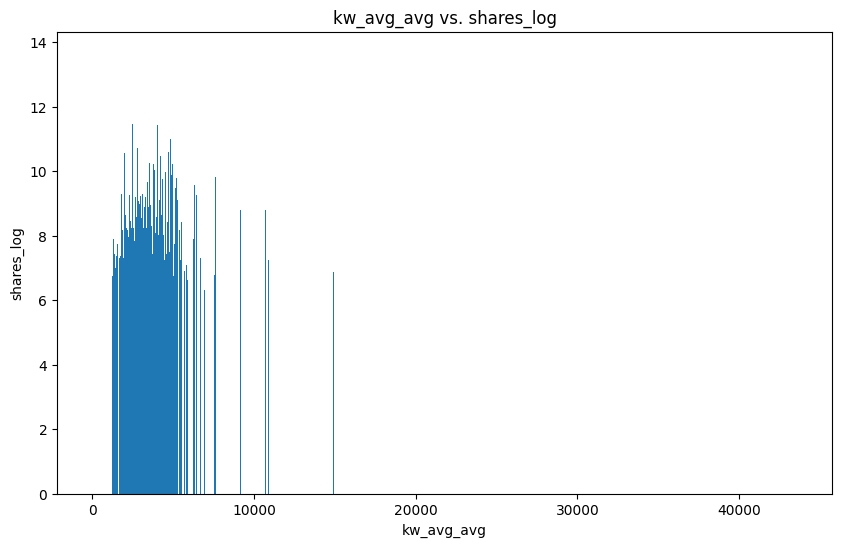

In [ ]:
# make a bar chart comparing kw_avg_avg to shares_log
plt.figure(figsize=(10, 6))
plt.bar(news['kw_avg_avg'], news['shares_log'])
plt.xlabel('kw_avg_avg')
plt.ylabel('shares_log')
plt.title('kw_avg_avg vs. shares_log')
plt.show()


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.bar(news['LDA_02'], news['shares_log'])
# plt.xlabel('LDA_02')
# plt.ylabel('shares_log')
# plt.title('LDA_02 vs. shares_log')
# plt.show()

Above we explored transformations by looking at the two most important predictors, LDA_02 and kw_avg_avg which influence the target by a lot. We plotted this in a bar chart and saw they are evenly distributed so we do not need transformations. Next we will standardize.

In [ ]:
ogX = X
ogY = y

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#THIS ADDS POLYNOMIAL HIGHER ORDER TERM
X['LDA_02_squared'] = X['LDA_02']**2
X['kw_avg_avg_squared'] = X['kw_avg_avg']**1/2

#THIS IS STEP WISE REMOVAL OF INSIGNIFICANT FEATURES
#'global_sentiment_polarity''global_rate_negative_words 'n_unique_tokens 'n_non_stop_unique_tokens' 'global_rate_positive_words' 'LDA_03', 'LDA_04''LDA_00',  'LDA_02','avg_positive_polarity'
X = X.drop(['global_sentiment_polarity','global_rate_negative_words', 'n_unique_tokens','n_non_stop_unique_tokens', 'global_rate_positive_words','LDA_00','LDA_02','LDA_03','LDA_04','avg_positive_polarity'], axis=1)

print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale_for_X = StandardScaler()
X_train_scaled = scale_for_X.fit_transform(X_train)
X_test_scaled = scale_for_X.transform(X_test)

newLR = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

predictions_scaled = newLR.get_prediction(sm.add_constant(X_test_scaled))

#bring to original
X_test_raw = scale_for_X.inverse_transform(X_test_scaled)

# print(newLR.summary())

#test for rmse with test set and train
rmse_train = np.sqrt(mean_squared_error(y_train, newLR.predict(sm.add_constant(X_train_scaled))))
print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train}")
rmse = np.sqrt(mean_squared_error(y_test, predictions_scaled.predicted_mean))
print(f"Root Mean Squared Error (RMSE): {rmse}")

print(newLR.summary())

Index(['n_tokens_title', 'num_hrefs', 'num_imgs', 'average_token_length',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'kw_avg_min', 'kw_max_max', 'kw_avg_avg',
       'self_reference_max_shares', 'is_weekend', 'LDA_01',
       'global_subjectivity', 'avg_negative_polarity',
       'title_sentiment_polarity', 'LDA_02_squared', 'kw_avg_avg_squared'],
      dtype='object')
Root Mean Squared Error (RMSE) on Training Set: 0.8816443269999622
Root Mean Squared Error (RMSE): 0.8734475860523752
                            OLS Regression Results                            
Dep. Variable:             shares_log   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:49:28   Log-Likelihood:      

Above we are able to see that the data does not overfit because the RMSE for the test set is very similar to the RMSE for the train set. First we ran this without the higher order term then we added the LDA_02 ^2 and the sqrt(kw_avg_avg) and we saw little to no impact on the overfitting, meaning the difference between Train RMSE and test RMSE is similar. This means higher order terms did not mess us up a lot, but it also did not provide monumental improvements.

Then we printed the summary to remove insignificant variables in a stepwise method. This was done iteratively we identified the highest p value and removed it from our rows as shown in the code above, then we re-printed and re-evaluated and kept going until we removed all insignificant variables.

Next, below we will use lasso to make this model even better:

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)

# remove insignificant variables
selected_features = np.array(X.columns)[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Root Mean Squared Error (RMSE) on Training Set: {rmse_train}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

Best alpha: 0.0002559547922699536
Selected features: ['n_tokens_title' 'num_hrefs' 'num_imgs' 'average_token_length'
 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'kw_avg_min' 'kw_max_max' 'kw_avg_avg'
 'self_reference_max_shares' 'is_weekend' 'LDA_01' 'global_subjectivity'
 'avg_negative_polarity' 'title_sentiment_polarity' 'LDA_02_squared']
Root Mean Squared Error (RMSE) on Training Set: 0.8816450120243344
Root Mean Squared Error (RMSE) on Test Set: 0.8734394770922532


Next, we review out-of-sample performance.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
X = ogX
y = ogY
param_grid = {'ccp_alpha': np.linspace(0, 0.01, 5)}  # Adjust range if needed


tree_reg = DecisionTreeRegressor(random_state=42)


grid_search = GridSearchCV(tree_reg, param_grid, cv=3, scoring='neg_mean_squared_error')  # Use 3-fold cross-validation
grid_search.fit(X_train, y_train)





GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': array([0.    , 0.0025, 0.005 , 0.0075, 0.01  ])},
             scoring='neg_mean_squared_error')

In [ ]:
best_tree_reg = grid_search.best_estimator_
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

print(f"Best ccp_alpha: {best_ccp_alpha}")


y_pred_best_tree = best_tree_reg.predict(X_test)
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
print(f"Mean Squared Error (Best Pruned Tree): {mse_best_tree}")


rf_reg = RandomForestRegressor(ccp_alpha=best_ccp_alpha, random_state=42)  # Using the best ccp_alpha from the decision tree
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")


print("\n## Model Performance Comparison")
print(f"- Decision Tree (Best Pruned): MSE = {mse_best_tree}")
print(f"- Random Forest: MSE = {mse_rf}")


Best ccp_alpha: 0.0025
Mean Squared Error (Best Pruned Tree): 0.773932733221927
Mean Squared Error (Random Forest): 0.7606728491093162

## Model Performance Comparison
- Decision Tree (Best Pruned): MSE = 0.773932733221927
- Random Forest: MSE = 0.7606728491093162



The models' out-of-sample performance shows that the random forest, with the same pruning parameter (ccp_alpha = 0.0025), had a somewhat higher MSE of 0.7607 than the pruned decision tree. Even though the decision tree is helpful for determining important decisions, the random forest is more accurate and appropriate for applications where prediction quality is a top priority. Both models are useful for forecasting future shares, but the decision tree provides clarity while the random forest data shows that it excels in accuracy.